# WeatherPy
----


### Key Findings:
* There are five geographical zones randing from the north frigid zone (north of 66.5 degrees latitude), the north temperate zone (between 23.5 and 66.5 degrees latitude) the torrid zone (between the -23.5 degrees south and 23.5 degrees north, including the equator), the south temperate zone (between -23.5 degress south and -66.5 degrees south) and the south frigid zone (south of -66.5 degrees latitude).

* Of the four scatter plots, the only chart where a relationship exists with latitude is temperature.

* The inverted U shape of the data suggests as you get closer to zero (the equator) the temperature tends to rise. And as you work closer to the poles (+/- 60 degrees latitude) the temperatures drop.

* In the northern hemisphere the temperatures stay elevated around the 20 degrees north mark but there is visual separation around 30 degrees where temperatures drop off. The same separation for the southern hemisphere occurs around the -25 degrees south mark.

* In our sample, the cities don't seem to be equally distributed across the latitudes. There are more northern cities above the 40 degree mark compared to cities south of the -40 degree mark. These northern cities as of the 5/26/19 report date tend to report colder temperatures than their southern peers which is supported by the fact that northern cities are in spring and southern cities are entering fall.

* Contrast the pattern found in the Temperature scatter chart to those found in the Humidity, Cloudiness and Wind Speed Scatters where there are no strong discernable patterns. 

* Humidity tends have a higher incidence of lower values in the northern hemisphere versus the south which is likely due to seasonal difference but there is no distinct visual separation. Variation in humidity decreases the closer a city gets to the equator but high humidity is not exclusive to that zone.

* Cloudiness has a high incidence of clear days but it also reveals possible clusters at 0%, 20%, 40%, 75-80% and 100%. However, this might be more a way of how cloudiness is measured. In the northern hemisphere between 20 & 40 degrees there is a high incidence of 0% cloudiness which makes me think there might be a heat wave in those cities.

* Again, compared to temperature, the patterns in cloudiness vs. city latitude are not as apparent. However, northern cities, especially those with a latitdue above 30 degrees tend to be windier than their southern hemisphere counterparts. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# pretty print
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count, store in a variable to use in a loop
cities_returned = len(cities)
cities_returned

639

In [21]:
# look at cities generated
cities

['butaritari',
 'louisbourg',
 'ushuaia',
 'da nang',
 'hamilton',
 'fortuna',
 'saltillo',
 'saskylakh',
 'kavaratti',
 'lasa',
 'marcona',
 'ojinaga',
 'rikitea',
 'cabras',
 'san policarpo',
 'port alfred',
 'provideniya',
 'port elizabeth',
 'castro',
 'pisco',
 'punta arenas',
 'ntungamo',
 'vaini',
 'torbay',
 'busselton',
 'margate',
 'vikulovo',
 'faanui',
 'illoqqortoormiut',
 'adrar',
 'hobart',
 'hilo',
 'shaunavon',
 'quelimane',
 'puerto ayora',
 'thompson',
 'qaanaaq',
 'albany',
 'ancud',
 'mataura',
 'cherskiy',
 'barra do garcas',
 'kaitangata',
 'sioux lookout',
 'zeya',
 'peru',
 'umm ruwabah',
 'namatanai',
 'khatanga',
 'kamenka',
 'ngunguru',
 'sao bras de alportel',
 'kushima',
 'macaboboni',
 'tsihombe',
 'grindavik',
 'bonthe',
 'lorengau',
 'georgetown',
 'pouembout',
 'koumac',
 'ruatoria',
 'bethel',
 'sibolga',
 'bengkulu',
 'galgani',
 'taolanaro',
 'lhokseumawe',
 'bambous virieux',
 'bonavista',
 'namtsy',
 'namibe',
 'nantucket',
 'dibaya',
 'baykit',
 


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [34]:
# this gets the data from the api (edits)

# get the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# declare open arrays
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# specify output file name, location
output_file = "C:\dumbass_sandbox\WeatherPy\output_file.txt"

# open the write object
with open(output_file, 'w') as file_object:

    # get the data
    for city in cities:
        weather_data = requests.get(base_url + api_key + "&q=" + city + "&units=imperial").json()
    
        try:
            lat.append(weather_data['coord']['lat'])
            # print city message for log
            file_object.write(f"Processing Record: of Set 1 | {city}\n")
        except KeyError:
            # if lat data missing then null
            lat.append(None)
            # print failed message for log
            file_object.write(f"No latitude data for: {city}--Skipped!\n")
              
        try:
            temp.append(weather_data['main']['temp'])
        except KeyError:
            # if temp data missing then null
            temp.append(None)
        
        try:
            humidity.append(weather_data['main']['humidity'])
        except KeyError:
            # if humidity data missing then null
            humidity.append(None)
    
        try:
            cloudiness.append(weather_data['clouds']['all'])
        except KeyError:
            # if cloudiness data is missing then null
            cloudiness.append(None)
    
        try:
            wind_speed.append(weather_data['wind']['speed'])
        except KeyError:
            # if wind speed data is missing then null
            wind_speed.append(None)
        
# test for end of code completion
print("all done!")    

all done!


### Convert Raw Data to DataFrame
* Display the DataFrame

In [35]:
# develop dict from result above
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}

# convert dictionary to data frame
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp,humidity,cloudiness,wind speed
0,butaritari,3.07,84.65,78.0,31.0,14.88
1,louisbourg,NaN,NaN,NaN,NaN,NaN
2,ushuaia,-54.81,37.40,64.0,75.0,8.05
3,da nang,NaN,NaN,NaN,NaN,NaN
4,hamilton,32.30,69.39,60.0,40.0,10.29


In [36]:
# get length of data frame to confirm cities count above 500 with our new data frame
print(len(weather_data))

639


In [37]:
# identify rows with nulls

no_temp_df = weather_data.notnull()
no_temp_df.head()

,city,lat,temp,humidity,cloudiness,wind speed
0,True,True,True,True,True,True
1,True,False,False,False,False,False
2,True,True,True,True,True,True
3,True,False,False,False,False,False
4,True,True,True,True,True,True


In [38]:
# create new data frame to handle the random selections
city_lat_x = weather_data

# drop rows with nulls
city_lat_x = city_lat_x.dropna()
# reset the index
city_lat_x = city_lat_x.reset_index(drop=True)
# verify result
city_lat_x.head()

,city,lat,temp,humidity,cloudiness,wind speed
0,butaritari,3.07,84.65,78.0,31.0,14.88
1,ushuaia,-54.81,37.40,64.0,75.0,8.05
2,hamilton,32.30,69.39,60.0,40.0,10.29
3,fortuna,38.18,64.29,82.0,0.0,2.91
4,saltillo,25.42,83.39,39.0,75.0,13.87


In [40]:
# verify count of non-null rows
print(len(city_lat_x))

573


### Randomly select cities for plotting

In [41]:
# randomly select 500 cities from the non-null rows

rand_cities = []
# sample 500 unique values, without replacement, convert to dataframe to we can merge the list with 
rand_cities = pd.DataFrame(np.random.choice(len(city_lat_x), 500, replace=False))

# rename the column
rand_cities.columns=['random_row']

# show the variables to confirm
rand_cities.head()

,random_row
0,195
1,453
2,40
3,93
4,257


In [42]:
# merge the randomly selected cities with the 
report_df = pd.merge(rand_cities, city_lat_x, right_index=True, left_on='random_row')
report_df.head()

,random_row,city,lat,temp,humidity,cloudiness,wind speed
0,195,sakmara,51.98,64.40,91.0,0.0,8.95
1,453,port lincoln,-34.72,57.47,67.0,99.0,19.53
2,40,zeya,53.74,54.05,30.0,0.0,9.62
3,93,port hardy,50.70,66.20,55.0,5.0,10.29
4,257,barrow,-38.31,50.81,78.0,100.0,5.68


In [43]:
# confirm size of sample selected

print(len(report_df))

500


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

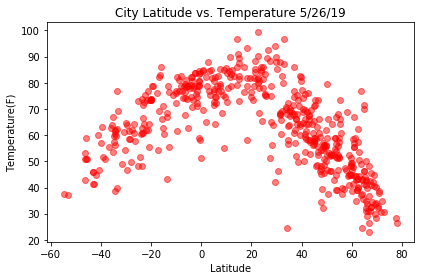

In [48]:
# plot temp vs. latitude

# build temp vs. latitude, put into new dataframe
temp_lat = report_df

# create scatter variables
x_axis_TL = temp_lat['lat']
y_axis_TL = temp_lat['temp']

# plot the scatter
plt.title("City Latitude vs. Temperature 5/26/19")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.scatter(x_axis_TL, y_axis_TL, marker="o", color='r', alpha=.5)

# save the plot
plt.tight_layout()
plt.savefig("js_lat_vs_temp_scatter.jpg")
plt.show()

#### Latitude vs. Humidity Plot

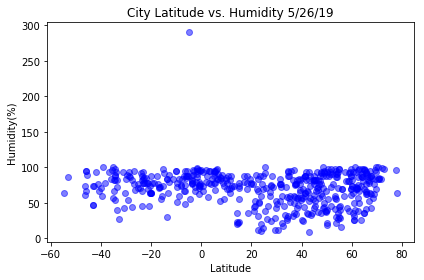

In [49]:
# plot Latitude vs. Humidity

# build humidity vs. latitude, put into new dataframe
humid_lat = report_df

# create scatter variables
x_axis_HL = humid_lat['lat']
y_axis_HL = humid_lat['humidity']

# plot the scatter
plt.title("City Latitude vs. Humidity 5/26/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(x_axis_HL, y_axis_HL, marker="o", color='b', alpha=.5)

# save the plot
plt.tight_layout()
plt.savefig("js_lat_vs_humidity_scatter.jpg")
plt.show()

#### Latitude vs. Cloudiness Plot

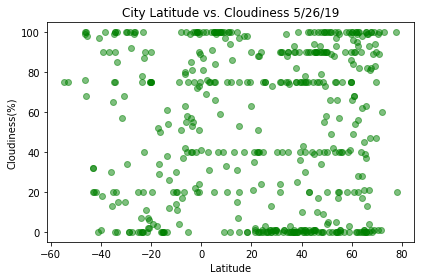

In [50]:
# plot Latitude vs. Cloudiness

# build temp vs. latitude, put into new dataframe
cloud_lat = report_df

# create scatter variables
x_axis_CL = cloud_lat['lat']
y_axis_CL = cloud_lat['cloudiness']

# plot the scatter
plt.title("City Latitude vs. Cloudiness 5/26/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(x_axis_CL, y_axis_CL, marker="o", color='g', alpha=.5)

# save the plot
plt.tight_layout()
plt.savefig("js_lat_vs_cloudiness_scatter.jpg")
plt.show()

#### Latitude vs. Wind Speed Plot

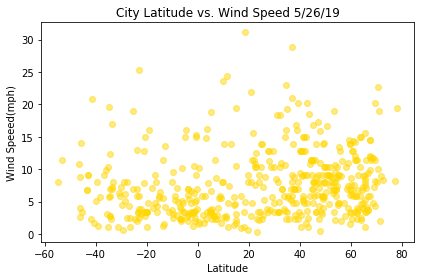

In [51]:
# plot Latitude vs. Wind speed

# build temp vs. latitude, put into new dataframe
wind_lat = report_df

# create scatter variables
x_axis_WL = wind_lat['lat']
y_axis_WL = wind_lat['wind speed']

# plot the scatter
plt.title("City Latitude vs. Wind Speed 5/26/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeed(mph)")
plt.scatter(x_axis_WL, y_axis_WL, marker="o", color='gold', alpha=.5)

# save the plot
plt.tight_layout()
plt.savefig("js_lat_vs_windspeed_scatter.jpg")
plt.show()